# Essai apprentissage - fully connected
Dataset prep : FFT + sans 4heure avant sans 4h apres

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten, Lambda, Reshape, Permute
from keras.layers.convolutional import Convolution1D, Convolution2D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,Adadelta,RMSprop
from keras.constraints import max_norm

# Training du CNN sur le patient 1

In [2]:
x,y = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(1)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(1)+'_y_4hours.npy')
train_images, train_labels,test_images, test_labels = np.expand_dims(x[19075:],-1),to_categorical(y[19075:]),np.expand_dims(x[:19075],-1),to_categorical(y[:19075])

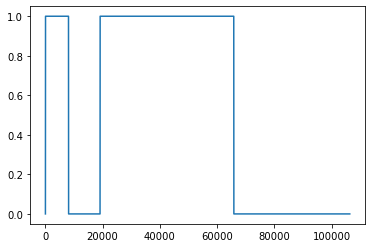

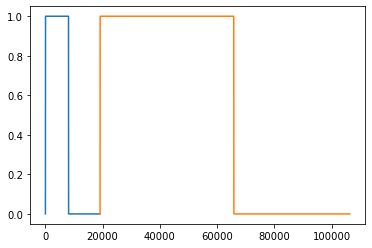

In [3]:
plt.plot(np.arange(0,len(y)),y)
plt.show()
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1])
plt.show()


In [4]:
shuffled_index_train =np.arange(0,len(train_labels))
np.random.shuffle(shuffled_index_train)
train_images, train_labels = train_images[shuffled_index_train,:,:,:],train_labels[shuffled_index_train,:]

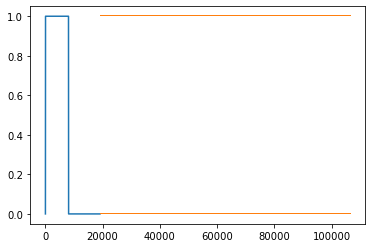

In [5]:
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1],',')
plt.show()

In [6]:
train_images.shape

(87273, 129, 15, 1)

In [7]:
model = models.Sequential()

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu',name='dens0'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu',name='dens1'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(32, activation='relu',name='dens2'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(16, activation='relu',name='dens3'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(2, activation='softmax',name='dens4'))


model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy','AUC'])
model.evaluate(test_images,  test_labels, verbose=2)


2022-07-07 17:00:14.269212: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-07 17:00:14.793445: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9621 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1


597/597 - 3s - loss: 0.6958 - accuracy: 0.5771 - auc: 0.5966 - 3s/epoch - 4ms/step


[0.6958470344543457, 0.5770904421806335, 0.5966469645500183]

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1935)              0         
                                                                 
 dropout (Dropout)           (None, 1935)              0         
                                                                 
 dens0 (Dense)               (None, 512)               991232    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dens1 (Dense)               (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dens2 (Dense)               (None, 32)                4

In [9]:


history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))


Epoch 1/20
2728/2728 [==============================] - 17s 6ms/step - loss: 0.4959 - accuracy: 0.7652 - auc: 0.8555 - val_loss: 0.8597 - val_accuracy: 0.5073 - val_auc: 0.6700
Epoch 2/20
2728/2728 [==============================] - 16s 6ms/step - loss: 0.2884 - accuracy: 0.8764 - auc: 0.9517 - val_loss: 0.9160 - val_accuracy: 0.5711 - val_auc: 0.7171
Epoch 3/20
2728/2728 [==============================] - 16s 6ms/step - loss: 0.2698 - accuracy: 0.8829 - auc: 0.9565 - val_loss: 0.6595 - val_accuracy: 0.5893 - val_auc: 0.7219
Epoch 4/20
2728/2728 [==============================] - 17s 6ms/step - loss: 0.2610 - accuracy: 0.8883 - auc: 0.9591 - val_loss: 0.5433 - val_accuracy: 0.6591 - val_auc: 0.7881
Epoch 5/20
2728/2728 [==============================] - 16s 6ms/step - loss: 0.2618 - accuracy: 0.8858 - auc: 0.9587 - val_loss: 0.5507 - val_accuracy: 0.6836 - val_auc: 0.7810
Epoch 6/20
2728/2728 [==============================] - 16s 6ms/step - loss: 0.2555 - accuracy: 0.8883 - auc: 0.960

597/597 - 2s - loss: 0.5703 - accuracy: 0.6116 - auc: 0.7631 - 2s/epoch - 4ms/step


[0.5703309178352356, 0.6115858554840088, 0.7630852460861206]

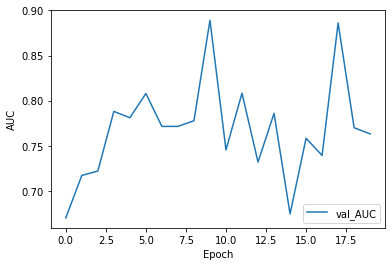

In [10]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

model.evaluate(test_images,  test_labels, verbose=2)


In [11]:
for i in range(6):
    model.layers[i].trainable = False
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1935)              0         
                                                                 
 dropout (Dropout)           (None, 1935)              0         
                                                                 
 dens0 (Dense)               (None, 512)               991232    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dens1 (Dense)               (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dens2 (Dense)               (None, 32)                4

# Transfert du modèle sur le patient 10

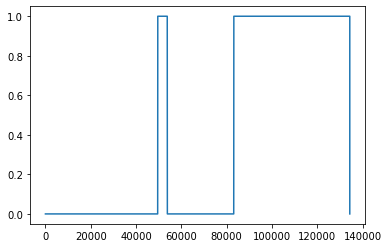

In [12]:
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(10)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(10)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [13]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

4197/4197 - 14s - loss: 1.2592 - accuracy: 0.4245 - auc: 0.5658 - 14s/epoch - 3ms/step


[1.2591553926467896, 0.4244830012321472, 0.5658316016197205]

In [14]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:47000],x2[70000:])),np.concatenate((y2[:47000],y2[70000:])),x2[47000:70000,:,:],y2[47000:70000]


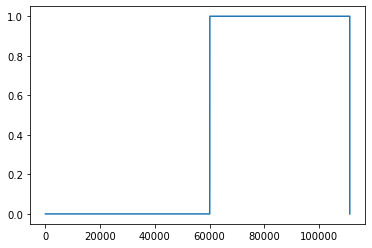

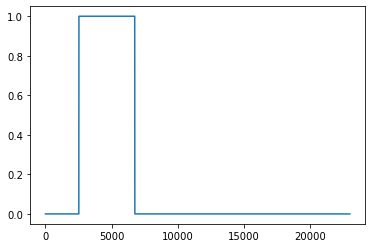

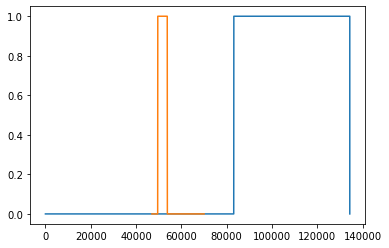

In [15]:
plt.plot(np.arange(0,len(y2_train)),y2_train)
plt.show()
plt.plot(np.arange(0,len(y2_test)),y2_test)
plt.show()
plt.plot(np.concatenate((np.arange(0,len(y2))[:47000],np.arange(0,len(y2))[70000:])),np.concatenate((y2[:47000],y2[70000:])))
plt.plot(np.arange(0,len(y2))[47000:70000],y2[47000:70000])
plt.show()

In [16]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

Epoch 1/10
3478/3478 [==============================] - 22s 6ms/step - loss: 0.6793 - accuracy: 0.5738 - auc: 0.6045 - val_loss: 0.5098 - val_accuracy: 0.8053 - val_auc: 0.9087
Epoch 2/10
3478/3478 [==============================] - 21s 6ms/step - loss: 0.6135 - accuracy: 0.6866 - auc: 0.7291 - val_loss: 0.4355 - val_accuracy: 0.7970 - val_auc: 0.9276
Epoch 3/10
3478/3478 [==============================] - 21s 6ms/step - loss: 0.5413 - accuracy: 0.7539 - auc: 0.8064 - val_loss: 0.4131 - val_accuracy: 0.8036 - val_auc: 0.9259
Epoch 4/10
3478/3478 [==============================] - 20s 6ms/step - loss: 0.5209 - accuracy: 0.7724 - auc: 0.8229 - val_loss: 0.3982 - val_accuracy: 0.8115 - val_auc: 0.9413
Epoch 5/10
3478/3478 [==============================] - 21s 6ms/step - loss: 0.5100 - accuracy: 0.7799 - auc: 0.8301 - val_loss: 0.3961 - val_accuracy: 0.8101 - val_auc: 0.9448
Epoch 6/10
3478/3478 [==============================] - 20s 6ms/step - loss: 0.4996 - accuracy: 0.7873 - auc: 0.837

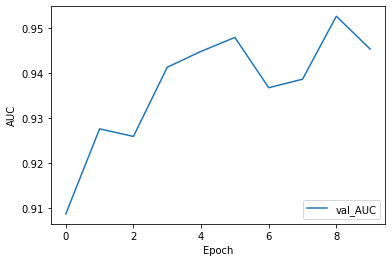

In [17]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')

plt.legend(loc='lower right')

# transfert du modele sur le patient 7

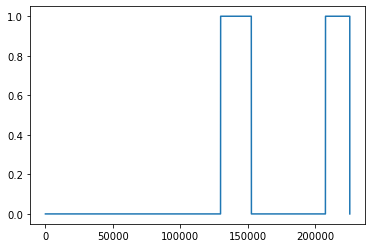

In [18]:
n_patient = 7
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [19]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

2022-07-07 17:09:46.898138: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1744766280 exceeds 10% of free system memory.
2022-07-07 17:09:48.167018: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1744766280 exceeds 10% of free system memory.


7045/7045 - 24s - loss: 0.3792 - accuracy: 0.8551 - auc: 0.9227 - 24s/epoch - 3ms/step


[0.37916550040245056, 0.855058491230011, 0.922671377658844]

In [20]:
x2_train, y2_train, x2_test, y2_test = x2[:153000],y2[:153000],x2[153000:],y2[153000:]


In [21]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

Epoch 1/10
4782/4782 [==============================] - 33s 7ms/step - loss: 0.3795 - accuracy: 0.8543 - auc: 0.9063 - val_loss: 0.7428 - val_accuracy: 0.7508 - val_auc: 0.7507
Epoch 2/10
4782/4782 [==============================] - 33s 7ms/step - loss: 0.3238 - accuracy: 0.8730 - auc: 0.9314 - val_loss: 0.7848 - val_accuracy: 0.7508 - val_auc: 0.7508
Epoch 3/10
4782/4782 [==============================] - 32s 7ms/step - loss: 0.3078 - accuracy: 0.8864 - auc: 0.9359 - val_loss: 0.8052 - val_accuracy: 0.7508 - val_auc: 0.7508
Epoch 4/10
4782/4782 [==============================] - 33s 7ms/step - loss: 0.2906 - accuracy: 0.8915 - auc: 0.9434 - val_loss: 0.8320 - val_accuracy: 0.7508 - val_auc: 0.7508
Epoch 5/10
4782/4782 [==============================] - 33s 7ms/step - loss: 0.2832 - accuracy: 0.8940 - auc: 0.9461 - val_loss: 0.7869 - val_accuracy: 0.7508 - val_auc: 0.7508
Epoch 6/10
4782/4782 [==============================] - 34s 7ms/step - loss: 0.2805 - accuracy: 0.8955 - auc: 0.947

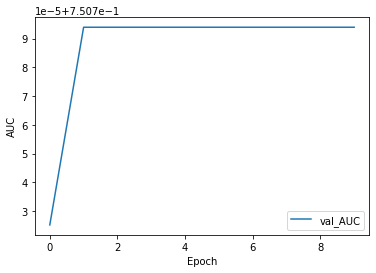

In [22]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

# Transfert sur patient 22

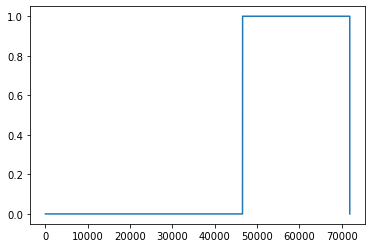

In [23]:
n_patient = 22
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [24]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

2248/2248 - 8s - loss: 1.1570 - accuracy: 0.6475 - auc: 0.6475 - 8s/epoch - 4ms/step


[1.1569643020629883, 0.647534966468811, 0.647534966468811]

In [25]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:30000],x2[55000:])),np.concatenate((y2[:30000],y2[55000:])),x2[30000:55000],y2[30000:55000]


In [26]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

Epoch 1/10
1466/1466 [==============================] - 11s 7ms/step - loss: 0.4171 - accuracy: 0.8397 - auc: 0.8920 - val_loss: 0.8828 - val_accuracy: 0.6624 - val_auc: 0.6624
Epoch 2/10
1466/1466 [==============================] - 11s 7ms/step - loss: 0.3756 - accuracy: 0.8700 - auc: 0.9103 - val_loss: 0.9267 - val_accuracy: 0.6624 - val_auc: 0.6624
Epoch 3/10
1466/1466 [==============================] - 11s 7ms/step - loss: 0.3667 - accuracy: 0.8758 - auc: 0.9126 - val_loss: 0.9791 - val_accuracy: 0.6624 - val_auc: 0.6624
Epoch 4/10
1466/1466 [==============================] - 11s 7ms/step - loss: 0.3516 - accuracy: 0.8844 - auc: 0.9186 - val_loss: 0.9973 - val_accuracy: 0.6624 - val_auc: 0.6624
Epoch 5/10
1466/1466 [==============================] - 11s 7ms/step - loss: 0.3487 - accuracy: 0.8845 - auc: 0.9195 - val_loss: 0.9414 - val_accuracy: 0.6624 - val_auc: 0.6624
Epoch 6/10
1466/1466 [==============================] - 11s 7ms/step - loss: 0.3483 - accuracy: 0.8859 - auc: 0.919

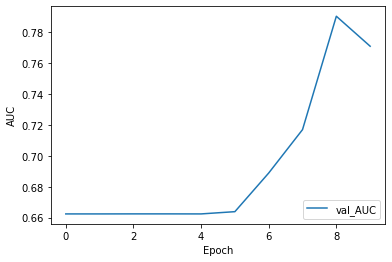

In [27]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

# transfert sur patient 16

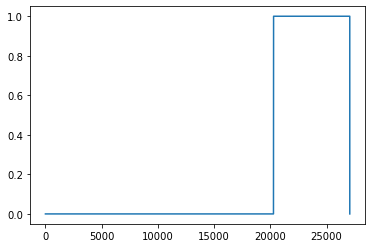

In [28]:
n_patient = 16
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [29]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

846/846 - 3s - loss: 0.7982 - accuracy: 0.7492 - auc: 0.7309 - 3s/epoch - 4ms/step


[0.7982089519500732, 0.7491501569747925, 0.7308545708656311]

In [30]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:15000],x2[22000:])),np.concatenate((y2[:15000],y2[22000:])),x2[15000:22000],y2[15000:22000]


In [31]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

Epoch 1/10
627/627 [==============================] - 5s 8ms/step - loss: 0.6087 - accuracy: 0.7252 - auc: 0.7316 - val_loss: 0.5578 - val_accuracy: 0.7541 - val_auc: 0.7541
Epoch 2/10
627/627 [==============================] - 5s 7ms/step - loss: 0.5779 - accuracy: 0.7469 - auc: 0.7459 - val_loss: 0.5594 - val_accuracy: 0.7541 - val_auc: 0.7541
Epoch 3/10
627/627 [==============================] - 4s 7ms/step - loss: 0.5715 - accuracy: 0.7477 - auc: 0.7498 - val_loss: 0.5588 - val_accuracy: 0.7541 - val_auc: 0.7541
Epoch 4/10
627/627 [==============================] - 4s 7ms/step - loss: 0.5706 - accuracy: 0.7477 - auc: 0.7474 - val_loss: 0.5586 - val_accuracy: 0.7541 - val_auc: 0.7541
Epoch 5/10
627/627 [==============================] - 4s 7ms/step - loss: 0.5686 - accuracy: 0.7477 - auc: 0.7481 - val_loss: 0.5590 - val_accuracy: 0.7541 - val_auc: 0.7541
Epoch 6/10
627/627 [==============================] - 4s 7ms/step - loss: 0.5681 - accuracy: 0.7477 - auc: 0.7454 - val_loss: 0.55

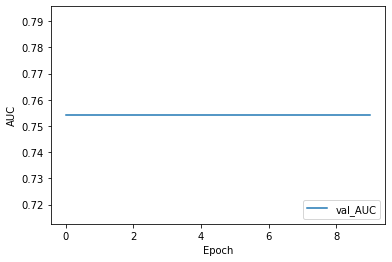

In [32]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')